In [174]:
import nltk
import pymorphy2
import math
from matplotlib import pyplot as pp
import codecs

morph = pymorphy2.MorphAnalyzer()

In [175]:
from sklearn.feature_extraction.text import TfidfTransformer

In [176]:
text = codecs.open("/home/katty/anaconda3/_nlp/project_hp/corp/5.txt", "r", "utf-8").read() # у меня был на компьютер текст Гарри Поттера, пробовала на нем

In [177]:
normal_text = [morph.parse(word.lower())[0].normal_form for word in nltk.tokenize.word_tokenize(text) if word.isalpha()]
print(normal_text[:10])

['джоан', 'роулинга', 'гарри', 'поттер', 'и', 'орден', 'феникс', 'глава', 'дадли', 'достаться']


In [178]:
key_word = "гермиона"
docs = [" ".join(normal_text[i:i+11]) for i in range(len(normal_text)-11) if normal_text[i+5] == key_word]
print(docs)

['от друг от рон и гермиона но он давно уже не', 'поздравительный карточка к день рождение гермиона написать думать мы увидеться совсем', 'мочь понять по расплывчатый намёк гермиона и рон быть вместе скорее', 'чем же они рон и гермиона занятый и почему он гарри', 'чем в письмо рон и гермиона но хороший уж фраза сириус', 'этоедва ли мочь заинтересовать рон гермиона или сириус ранний предостерегать боль', 'из голова почему рон и гермиона оказаться вместе там куда он', 'мочь быть послать весточка рон гермиона или сириус нет это не', 'адресовать сириус второе рон третий гермиона он сова букля отлучиться поохотиться', 'письмо сириус другой рон третий гермиона и не возвращаться без хороший', 'с ответ сириус рон и гермиона они некуда быть деваться прийтись', 'для член орден рон и гермиона наверху ты подождать с они', 'ты всё объяснить рон и гермиона а я правда надо бежать', 'заполнить пышный масса густой волос гермиона кинуться к он с объятие', 'для дать он хоть вздохнуть гермиона сказать рон

In [179]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [180]:

cv=CountVectorizer()
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(docs)

In [181]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [182]:
count_vector=cv.transform(docs)
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [183]:
print(tf_idf_vector.shape)

(1198, 2759)


In [184]:
res = tf_idf_vector.toarray()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

res_scal = scaler.fit_transform(res)

print(res_scal)

[[-0.04085567 -0.02890367 -0.02890367 ... -0.04088432 -0.06443833
  -0.02890367]
 [-0.04085567 -0.02890367 -0.02890367 ... -0.04088432 -0.06443833
  -0.02890367]
 [-0.04085567 -0.02890367 -0.02890367 ... -0.04088432 -0.06443833
  -0.02890367]
 ...
 [-0.04085567 -0.02890367 -0.02890367 ... -0.04088432 -0.06443833
  -0.02890367]
 [-0.04085567 -0.02890367 -0.02890367 ... -0.04088432 -0.06443833
  -0.02890367]
 [-0.04085567 -0.02890367 -0.02890367 ... -0.04088432 -0.06443833
  -0.02890367]]


In [185]:
from sklearn.decomposition import PCA

pca = PCA(20)
c_20 = pca.fit_transform(res_scal)
print(c_20)

[[-0.19555505 -0.26048617 -0.25236121 ...  0.67717395  0.10211731
   0.30045126]
 [-0.23592429 -0.87984266  0.16547747 ... -1.21176989 -3.68888073
   5.59537158]
 [-0.17879264 -0.06331812 -0.09381725 ... -1.00274342  0.22891827
  -0.27955211]
 ...
 [ 1.4022194  -1.56978178 13.89051915 ...  0.83749766  1.60661604
  -6.92618494]
 [-0.15126835 -0.21518303 -0.52098155 ...  0.58322408  1.30575307
   1.51331854]
 [-0.24848806 -0.4441996  -0.07528473 ...  0.42754035  0.0706285
   0.34410703]]


In [186]:
from sklearn.cluster import KMeans

kmeans = KMeans(2)

cluster = kmeans.fit_predict(c_20)

cls_1 = []
cls_2 = []
for i in range(len(docs)):
    if cluster[i] == 0:
        cls_1.append(docs[i])
    else:
        cls_2.append(docs[i])
print(cluster)
print(cls_1)
print(cls_2)

[0 0 0 ... 0 0 0]
['от друг от рон и гермиона но он давно уже не', 'поздравительный карточка к день рождение гермиона написать думать мы увидеться совсем', 'мочь понять по расплывчатый намёк гермиона и рон быть вместе скорее', 'чем же они рон и гермиона занятый и почему он гарри', 'чем в письмо рон и гермиона но хороший уж фраза сириус', 'этоедва ли мочь заинтересовать рон гермиона или сириус ранний предостерегать боль', 'из голова почему рон и гермиона оказаться вместе там куда он', 'мочь быть послать весточка рон гермиона или сириус нет это не', 'адресовать сириус второе рон третий гермиона он сова букля отлучиться поохотиться', 'письмо сириус другой рон третий гермиона и не возвращаться без хороший', 'с ответ сириус рон и гермиона они некуда быть деваться прийтись', 'для член орден рон и гермиона наверху ты подождать с они', 'ты всё объяснить рон и гермиона а я правда надо бежать', 'заполнить пышный масса густой волос гермиона кинуться к он с объятие', 'для дать он хоть вздохнуть ге

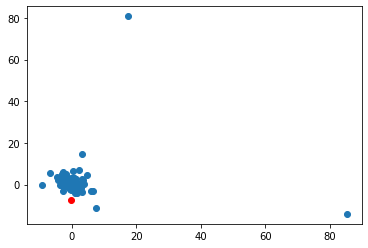

In [187]:
vis_scaler = StandardScaler()
vis_pca = PCA(2)
t_scales = vis_scaler.fit_transform(res)
t_2 = vis_pca.fit_transform(t_scales)

t_first = t_2[cluster == 0, :]
t_second = t_2[cluster == 1, :]

pp.plot(t_first[:, 0], t_first[:, 1], 'o')
pp.plot(t_second[:, 0], t_second[:, 1], 'or')